In [2]:
# Set up workspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import *

In [70]:
# Imporve the DPI of the charts
plt.rcParams['figure.dpi'] = 144
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={"figure.dpi":144, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
sns.color_palette("Set2")
sns.despine()

<Figure size 864x576 with 0 Axes>

In [71]:
# Import data
cases = pd.read_csv('covid_19_uk_cases.csv')
doses = pd.read_csv('covid_19_uk_vaccinated.csv')
tweets = pd.read_csv('tweets.csv')

In [72]:
#cases_gibraltar['daily_deaths'] = cases_gibraltar['Deaths']-cases_gibraltar['Deaths'].shift(+1)
#cases_gibraltar

In [73]:
# Inspect data
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Deaths                    7582 non-null   float64
 9   Cases                     7582 non-null   float64
 10  Recovered                 7582 non-null   float64
 11  Hospitalised              7582 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 711.1+ KB


In [74]:
# Update dtype in cases and sort by Province and Date
cases['Date'] = pd.to_datetime(cases['Date'])
cases = cases.sort_values(by=['Province/State', 'Date'])
cases

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-10,23.0,2898.0,0.0,446.0
6948,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-11,23.0,2898.0,0.0,456.0
6949,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-12,23.0,2898.0,0.0,456.0
6950,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-13,23.0,2905.0,0.0,0.0


In [75]:
# Convert all cumulative data to daily data
cases['Daily Deaths'] = cases['Deaths']-cases['Deaths'].shift(+1)
cases['Daily Cases'] = cases['Cases']-cases['Cases'].shift(+1)
cases['Daily Recovered'] = cases['Recovered']-cases['Recovered'].shift(+1)
cases['Daily Hospitalised'] = cases['Hospitalised']-cases['Hospitalised'].shift(+1)

# Rename cumulative data to avoid confusion
cases.rename(columns={'Deaths':'Cumulative Deaths', 'Cases':'Cumulative Cases', 
                      'Recovered':'Cumulative Recovered', 
                      'Hospitalised':'Cumulative Hospitalised'}, inplace=True)
cases

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Cumulative Deaths,Cumulative Cases,Cumulative Recovered,Cumulative Hospitalised,Daily Deaths,Daily Cases,Daily Recovered,Daily Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-10,23.0,2898.0,0.0,446.0,0.0,3.0,0.0,10.0
6948,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-11,23.0,2898.0,0.0,456.0,0.0,0.0,0.0,10.0
6949,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-12,23.0,2898.0,0.0,456.0,0.0,0.0,0.0,0.0
6950,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-13,23.0,2905.0,0.0,0.0,0.0,7.0,0.0,-456.0


In [76]:
# Add date and year column for later analysis
cases['Month'] = cases.Date.dt.month
cases['Year'] = cases.Date.dt.year
cases

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Cumulative Deaths,Cumulative Cases,Cumulative Recovered,Cumulative Hospitalised,Daily Deaths,Daily Cases,Daily Recovered,Daily Hospitalised,Month,Year
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1,2020
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-10,23.0,2898.0,0.0,446.0,0.0,3.0,0.0,10.0,10,2021
6948,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-11,23.0,2898.0,0.0,456.0,0.0,0.0,0.0,10.0,10,2021
6949,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-12,23.0,2898.0,0.0,456.0,0.0,0.0,0.0,0.0,10,2021
6950,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-13,23.0,2905.0,0.0,0.0,0.0,7.0,0.0,-456.0,10,2021


In [77]:
# Inspect doses
doses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Vaccinated                7584 non-null   int64  
 9   First Dose                7584 non-null   int64  
 10  Second Dose               7584 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 651.9+ KB


In [78]:
# Now do same for cases data - update dtype, sort by Province and Date
doses['Date'] = pd.to_datetime(doses['Date'])
doses = doses.sort_values(by=['Province/State', 'Date'])
doses

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6947,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-10,1264,1437,1264
6948,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-11,1536,1896,1536
6949,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-12,1751,2395,1751
6950,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-13,0,0,0


In [79]:
# Add date and year column for later analysis
doses['Month'] = doses.Date.dt.month
doses['Year'] = doses.Date.dt.year
doses

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose,Month,Year
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0,1,2020
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0,1,2020
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0,1,2020
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0,1,2020
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-10,1264,1437,1264,10,2021
6948,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-11,1536,1896,1536,10,2021
6949,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-12,1751,2395,1751,10,2021
6950,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-13,0,0,0,10,2021


In [80]:
# Add cumulative data in new column (doses is a daily data file)
doses['Cumulative Vaccinated'] = doses['Vaccinated'].cumsum()
doses['Cumulative First Dose'] = doses['First Dose'].cumsum()
doses['Cumulative Second Dose'] = doses['Second Dose'].cumsum()

# Rename daily data to avoid confusion
doses.rename(columns={'Vaccinated':'Daily Vaccinated', 
                      'First Dose':'Daily First Dose', 
                      'Second Dose':'Daily Second Dose'}, inplace=True)
doses

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Daily Vaccinated,Daily First Dose,Daily Second Dose,Month,Year,Cumulative Vaccinated,Cumulative First Dose,Cumulative Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0,1,2020,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0,1,2020,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0,1,2020,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0,1,2020,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0,1,2020,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-10,1264,1437,1264,10,2021,44845058,46962073,44845058
6948,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-11,1536,1896,1536,10,2021,44846594,46963969,44846594
6949,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-12,1751,2395,1751,10,2021,44848345,46966364,44848345
6950,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-13,0,0,0,10,2021,44848345,46966364,44848345


In [81]:
# Add columns for daily and cumulative 'first dose but no second'
doses['Cumulative No Second Dose'] = doses['Cumulative First Dose'] - doses['Cumulative Second Dose']
doses['Daily No Second Dose'] = doses['Daily First Dose'] - doses['Daily Second Dose']

# NB 'daily no second dose' doesn't really make any sense, but is asked for in question
doses

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Daily Vaccinated,Daily First Dose,Daily Second Dose,Month,Year,Cumulative Vaccinated,Cumulative First Dose,Cumulative Second Dose,Cumulative No Second Dose,Daily No Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0,1,2020,0,0,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0,1,2020,0,0,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0,1,2020,0,0,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0,1,2020,0,0,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0,1,2020,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-10,1264,1437,1264,10,2021,44845058,46962073,44845058,2117015,173
6948,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-11,1536,1896,1536,10,2021,44846594,46963969,44846594,2117375,360
6949,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-12,1751,2395,1751,10,2021,44848345,46966364,44848345,2118019,644
6950,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2021-10-13,0,0,0,10,2021,44848345,46966364,44848345,2118019,0


In [82]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3959 non-null   object 
 1   id                         3959 non-null   float64
 2   id_str                     3959 non-null   float64
 3   text                       3959 non-null   object 
 4   truncated                  3959 non-null   object 
 5   source                     3959 non-null   object 
 6   in_reply_to_status_id      0 non-null      float64
 7   in_reply_to_status_id_str  0 non-null      float64
 8   in_reply_to_user_id        0 non-null      float64
 9   in_reply_to_user_id_str    0 non-null      float64
 10  in_reply_to_screen_name    0 non-null      float64
 11  contributors               0 non-null      float64
 12  is_quote_status            3959 non-null   object 
 13  retweet_count              3960 non-null   int64

In [15]:
# Update dtype in tweets and sort by date
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets = tweets.sort_values(by=['created_at'])
tweets

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str
3959,2022-05-15,1.525900e+18,1.525900e+18,NORTHERN IRELAND. \n\nNI #COVID19 data has ...,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,NaN,...,NaN,False,1,0,False,False,en,False,NaN,NaN
1413,2022-05-15,1.525860e+18,1.525860e+18,At this point in the #COVID19 pandemic is it a...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,NaN,NaN,NaN
1414,2022-05-15,1.525850e+18,1.525850e+18,"The Lost Americans \n""Nearly one million peopl...",False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
1415,2022-05-15,1.525840e+18,1.525840e+18,"The pandemic, that never was, informed me of h...",False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,NaN,NaN,NaN
1416,2022-05-15,1.525830e+18,1.525830e+18,#covid is a now religion. people wear masks ou...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2022-05-23,1.528740e+18,1.528740e+18,Here are some of the new developments regardin...,False,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
533,2022-05-23,1.528740e+18,1.528740e+18,7 Day Covid Growth in Deaths per 1K Population...,False,"<a href=""http://www.suttersmillcapital.com"" re...",NaN,NaN,NaN,NaN,...,NaN,False,1,1,False,False,en,False,NaN,NaN
523,2022-05-23,1.528740e+18,1.528740e+18,Rogue SA Drs: people have called our bluff and...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,NaN,NaN,NaN
0,2022-05-23,1.528750e+18,1.528750e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN


[Text(0, 0, 'Anguilla'),
 Text(1, 0, 'Bermuda'),
 Text(2, 0, 'British Virgin Islands'),
 Text(3, 0, 'Cayman Islands'),
 Text(4, 0, 'Channel Islands'),
 Text(5, 0, 'Falkland Islands (Malvinas)'),
 Text(6, 0, 'Gibraltar'),
 Text(7, 0, 'Isle of Man'),
 Text(8, 0, 'Montserrat'),
 Text(9, 0, 'Others'),
 Text(10, 0, 'Saint Helena, Ascension and Tristan da Cunha'),
 Text(11, 0, 'Turks and Caicos Islands')]

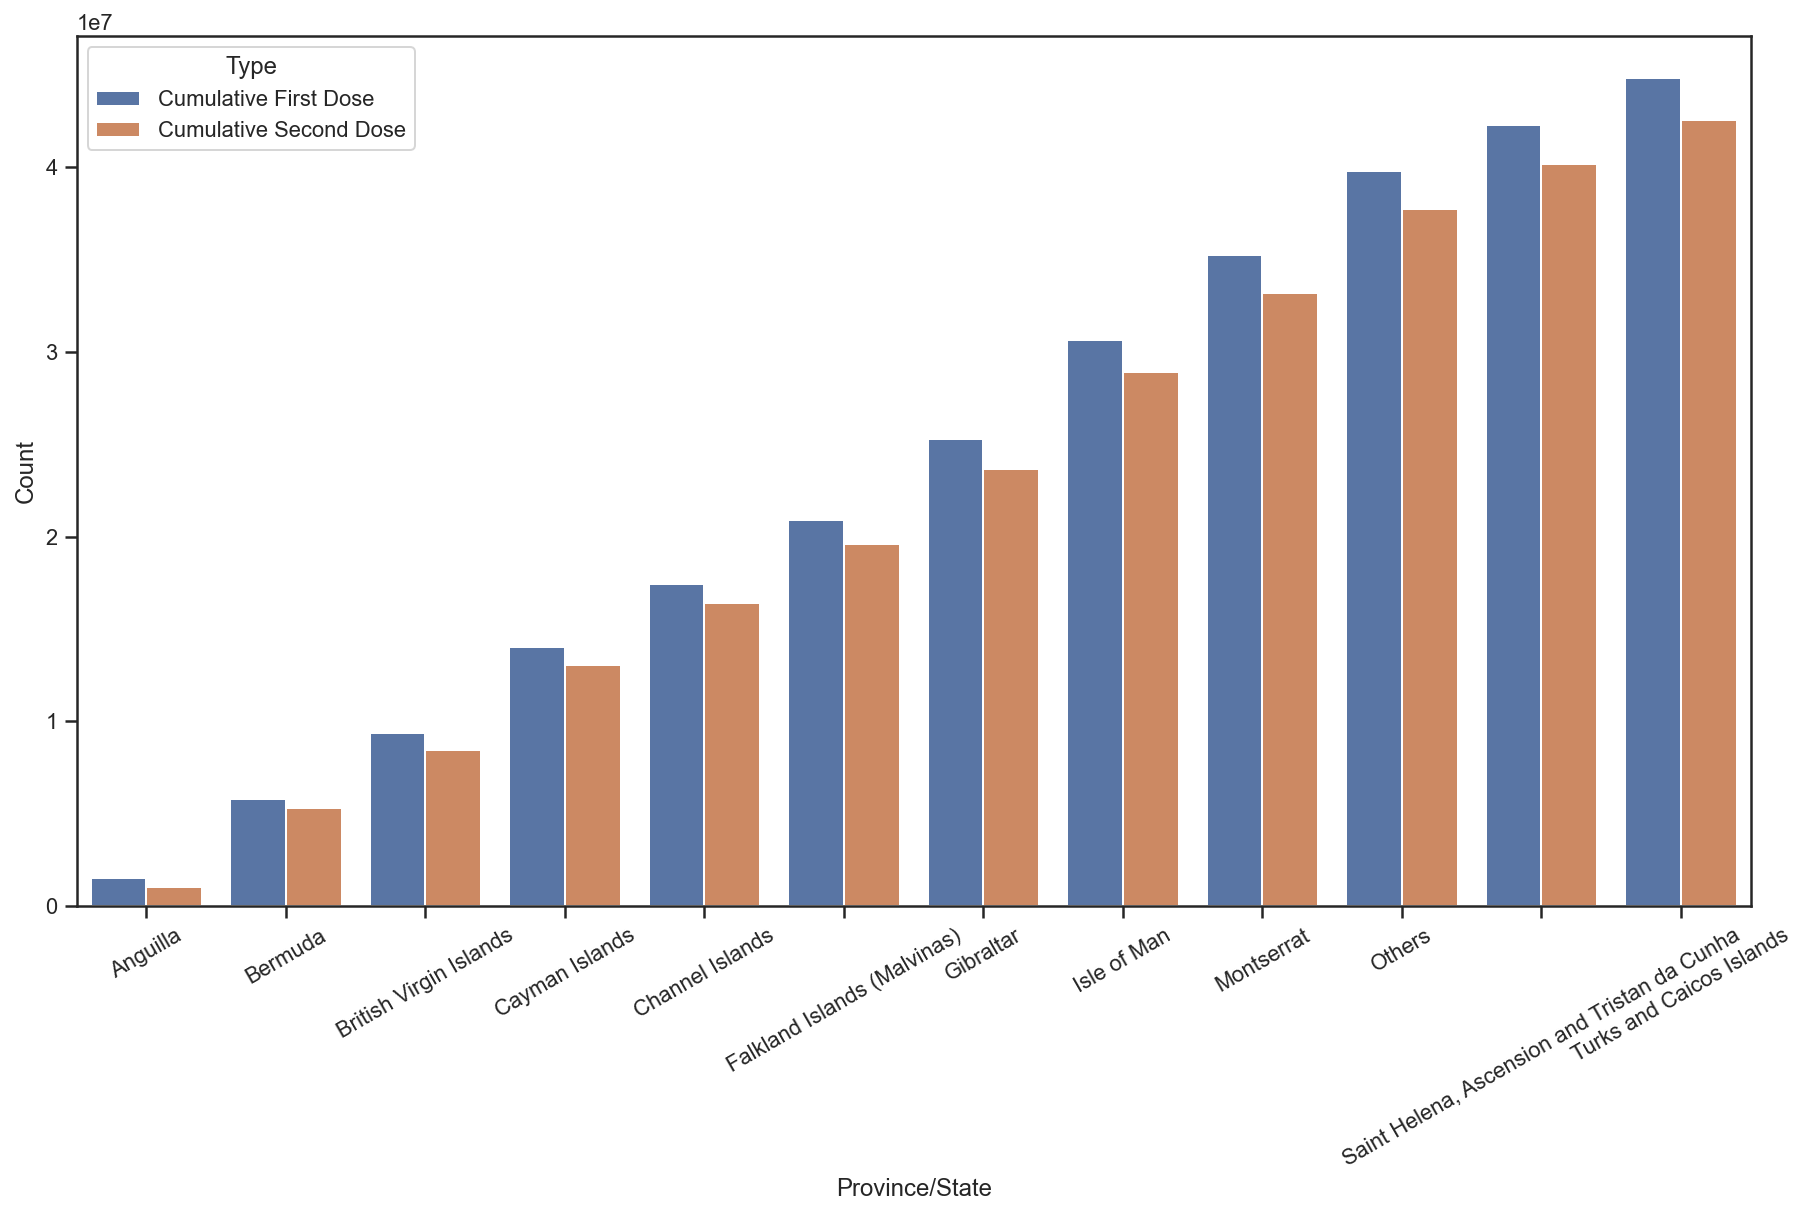

In [89]:
# Create chart of number of first and second doses by Province
doses_chart = pd.melt(doses, id_vars =['Province/State', 'Country/Region','Date'], 
                      value_vars =['Cumulative First Dose', 'Cumulative Second Dose'])

doses_chart.rename(columns = {'variable':'Type', 'value':'Count'}, inplace = True)

plt.figure(figsize = (15,8))

ax = sns.barplot(x='Province/State', y='Count', hue='Type', data=doses_chart, ci=None)

ax.set_xticklabels(ax.get_xticklabels( ),rotation = 30)

# Need to set the Y axis scale

In [33]:
# Convert daily cases figures into montly figures
monthly_cases = cases.groupby([cases.Date.dt.year, cases.Date.dt.month])[['Date', 'Daily Deaths', 'Daily Recovered', 'Daily Hospitalised']].sum()

# Rename columns to avoid confusion
monthly_cases.rename(columns={'Daily Deaths':'Monthly Deaths', 
                              'Daily Recovered':'Monthly Recoveries', 

                              'Daily Hospitalised':'Monthly Hospitalised'}, inplace=True)

monthly_cases

Monthly Deaths  Monthly Recoveries  Monthly Hospitalised
Date Date                                                          
2020 1          -138624.0                 0.0                   0.0
     2                0.0                 8.0                   0.0
     3             2457.0               171.0               12600.0
     4            24297.0               680.0                2564.0
     5            10773.0               331.0               -7927.0
     6             2952.0               180.0               -3854.0
     7              795.0                69.0               -2117.0
     8              315.0               243.0                -411.0
     9              644.0               692.0                1654.0
     10            4412.0               466.0                9783.0
     11           11900.0               732.0                4253.0
     12           15077.0              1909.0               10013.0
2021 1            32745.0              4174.0                6007.0
     2            16716.0              1987.0              -19798.0
     3             3872.0              1430.0               -9044.0
     4              820.0              1610.0               -2378.0
     5              270.0               824.0                -436.0
     6              359.0               229.0                 897.0
     7             1545.0              5192.0                4131.0
     8             2910.0            -20928.0                1718.0
     9             4184.0                 0.0                -906.0
     10            1604.0                 0.0               -6769.0

In [ ]:
# NB this reveals problems:
# final data (final entry drops off producing strong negative)
# starting value (shift function in a long list)

# Final data problem may be solvable by ffill the data
# Starting data problem may be solvable by removing first row/date of data

# Export output to excel for data cleaning
monthly_cases.to_csv('MonthlyCases.csv')

In [25]:
# Bring back cleaned data
monthly_cases_cleaned = pd.read_csv('MonthlyCasesCleaned.csv')
monthly_cases_cleaned

,Date,Monthly Deaths,Monthly Recoveries,Monthly Hospitalised
0,Jan-20,0,0,0
1,Feb-20,0,8,0
2,Mar-20,2457,171,12600
3,Apr-20,24297,680,2564
4,May-20,10773,331,0
5,Jun-20,2952,180,0
6,Jul-20,795,69,0
7,Aug-20,315,243,0
8,Sep-20,644,692,1654
9,Oct-20,4412,466,9783


<AxesSubplot:>

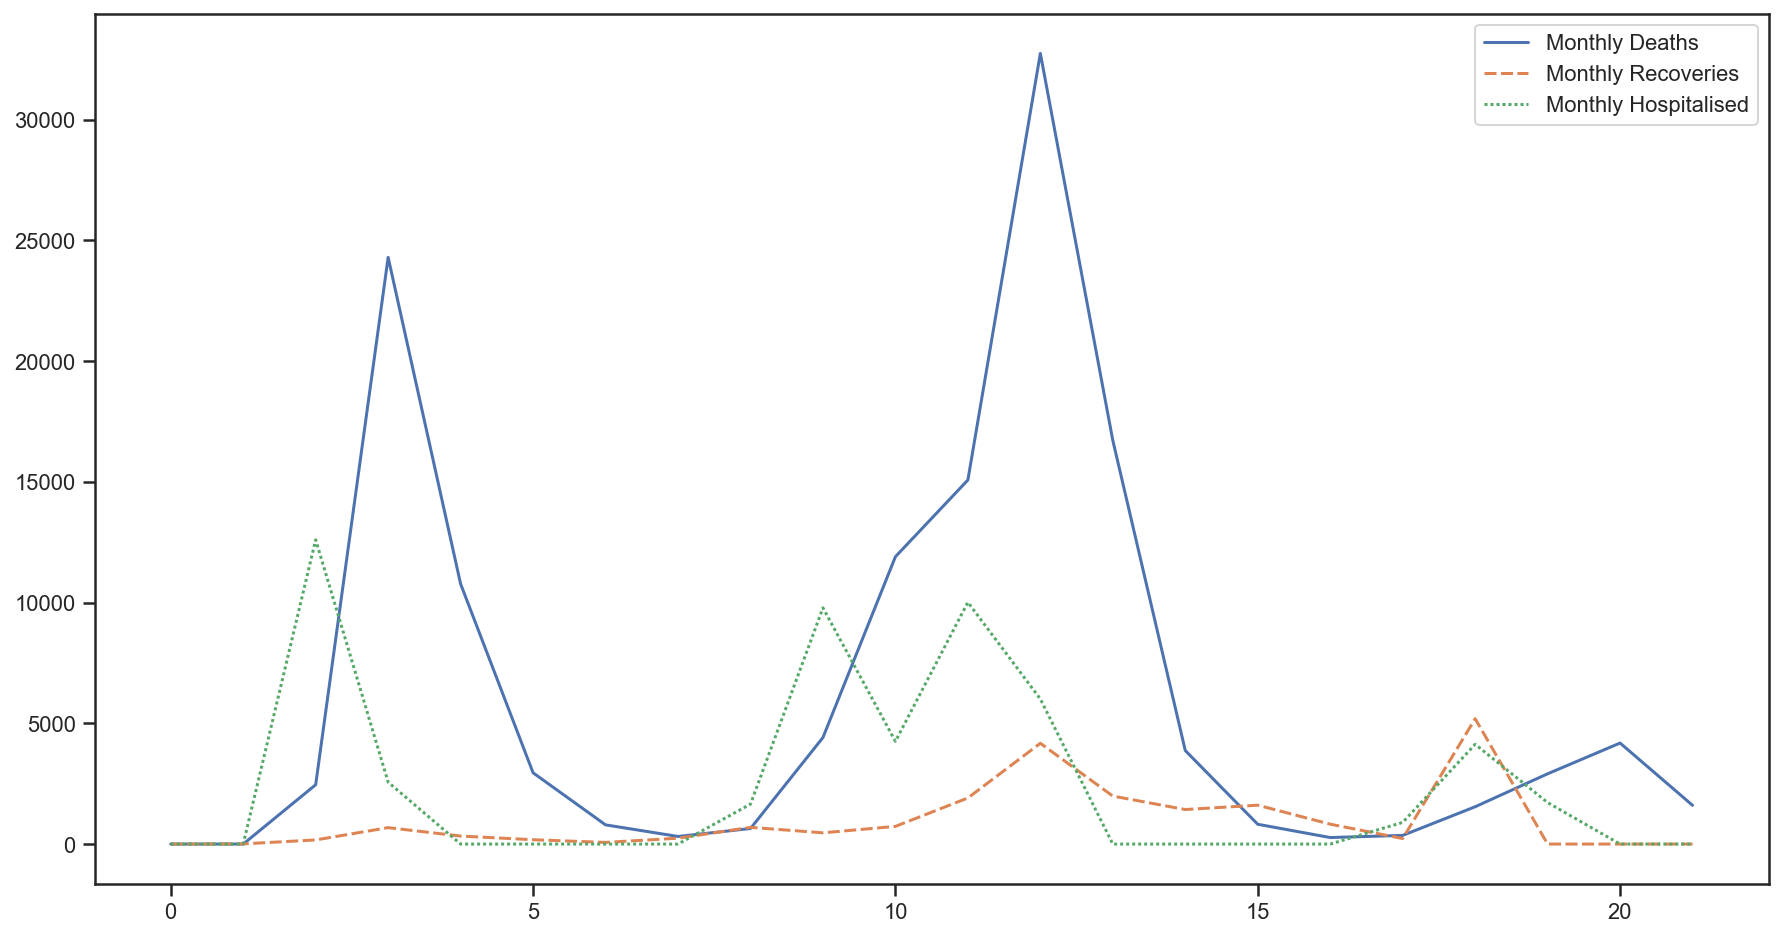

In [84]:
# Chart total monthly data
plt.figure(figsize = (15,8))
sns.lineplot(data=monthly_cases_cleaned)

In [29]:
# Chart daily deaths
# sns.lineplot(data=cases, x='Date', y='Daily Deaths')

# Chart daily recoveries
# sns.lineplot(data=cases, x='Date', y='Daily Recovered')

In [36]:
# Convert daily cases figures into montly figures
monthly_cases_country = cases.groupby(['Province/State', cases.Date.dt.year, cases.Date.dt.month])[['Date', 'Daily Deaths', 'Daily Recovered', 'Daily Hospitalised']].sum()

# Rename columns to avoid confusion
monthly_cases_country.rename(columns={'Daily Deaths':'Monthly Deaths', 
                              'Daily Recovered':'Monthly Recoveries', 

                              'Daily Hospitalised':'Monthly Hospitalised'}, inplace=True)

monthly_cases_country

Monthly Deaths  Monthly Recoveries  \
Province/State           Date Date                                       
Anguilla                 2020 1                0.0                 0.0   
                              2                0.0                 0.0   
                              3                0.0                 0.0   
                              4                0.0                 3.0   
                              5                0.0                 0.0   
...                                            ...                 ...   
Turks and Caicos Islands 2021 6                1.0                17.0   
                              7                0.0                33.0   
                              8                2.0             -2431.0   
                              9                3.0                 0.0   
                              10               0.0                 0.0   

                                    Monthly Hospitalised  
Province/State           Date Date                        
Anguilla                 2020 1                      0.0  
                              2                      0.0  
                              3                   1323.0  
                              4                    269.0  
                              5                   -832.0  
...                                                  ...  
Turks and Caicos Islands 2021 6                     59.0  
                              7                    268.0  
                              8                    112.0  
                              9                    -59.0  
                              10                  -440.0  

[264 rows x 3 columns]

In [37]:
# Export output to excel for data cleaning
monthly_cases_country.to_csv('MonthlyCasesCountry.csv')

In [38]:
# Bring back cleaned data
monthly_cases_country_cleaned = pd.read_csv('MonthlyCasesCountryCleaned.csv')
monthly_cases_country_cleaned

,Province/State,Date,Monthly Deaths,Monthly Recoveries,Monthly Hospitalised
0,Anguilla,Jan-20,0,0,0
1,Anguilla,Feb-20,0,0,0
2,Anguilla,Mar-20,0,0,1323
3,Anguilla,Apr-20,0,3,269
4,Anguilla,May-20,0,0,0
...,...,...,...,...,...
259,Turks and Caicos Islands,Jun-21,1,17,59
260,Turks and Caicos Islands,Jul-21,0,33,268
261,Turks and Caicos Islands,Aug-21,2,0,112
262,Turks and Caicos Islands,Sep-21,3,0,0


In [41]:
# Pivot data for linechart
monthly_country_cases_chart = monthly_cases_country_cleaned.pivot('Date', 'Province/State')
monthly_country_cases_chart

Monthly Deaths                                                \
Province/State       Anguilla Bermuda British Virgin Islands Cayman Islands   
Date                                                                          
Apr-20                      0       6                      1              0   
Apr-21                      0      16                      0              0   
Aug-20                      0       0                      0              0   
Aug-21                      0       1                      6              0   
Dec-20                      0       1                      0              0   
Feb-20                      0       0                      0              0   
Feb-21                      0       0                      0              0   
Jan-20                      0       0                      0              0   
Jan-21                      0       2                      0              0   
Jul-20                      0       0                      0              0   
Jul-21                      0       0                     30              0   
Jun-20                      0       0                      0              0   
Jun-21                      0       0                      0              0   
Mar-20                      0       0                      0              1   
Mar-21                      0       0                      0              0   
May-20                      0       3                      0              0   
May-21                      0       5                      0              0   
Nov-20                      0       0                      0              1   
Oct-20                      0       0                      0              0   
Oct-21                      0      23                      0              0   
Sep-20                      0       0                      0              0   
Sep-21                      1      38                      0              0   

                                                                      \
Province/State Channel Islands Falkland Islands (Malvinas) Gibraltar   
Date                                                                   
Apr-20                      37                           0         0   
Apr-21                       0                           0         0   
Aug-20                       1                           0         0   
Aug-21                       8                           0         3   
Dec-20                      10                           0         2   
Feb-20                       0                           0         0   
Feb-21                       4                           0        16   
Jan-20                       0                           0         0   
Jan-21                      24                           0        70   
Jul-20                       0                           0         0   
Jul-21                       1                           0         0   
Jun-20                       2                           0         0   
Jun-21                       0                           0         0   
Mar-20                       3                           0         0   
Mar-21                       0                           0         1   
May-20                       5                           0         0   
May-21                       0                           0         0   
Nov-20                       0                           0         5   
Oct-20                       0                           0         0   
Oct-21                       3                           0         0   
Sep-20                       0                           0         0   
Sep-21                       2                           0         0   

                                              ...   Monthly Hospitalised  \
Province/State Isle of Man Montserrat Others  ... British Virgin Islands   
Date                                          ...                          
Apr-20    

<AxesSubplot:xlabel='Date'>

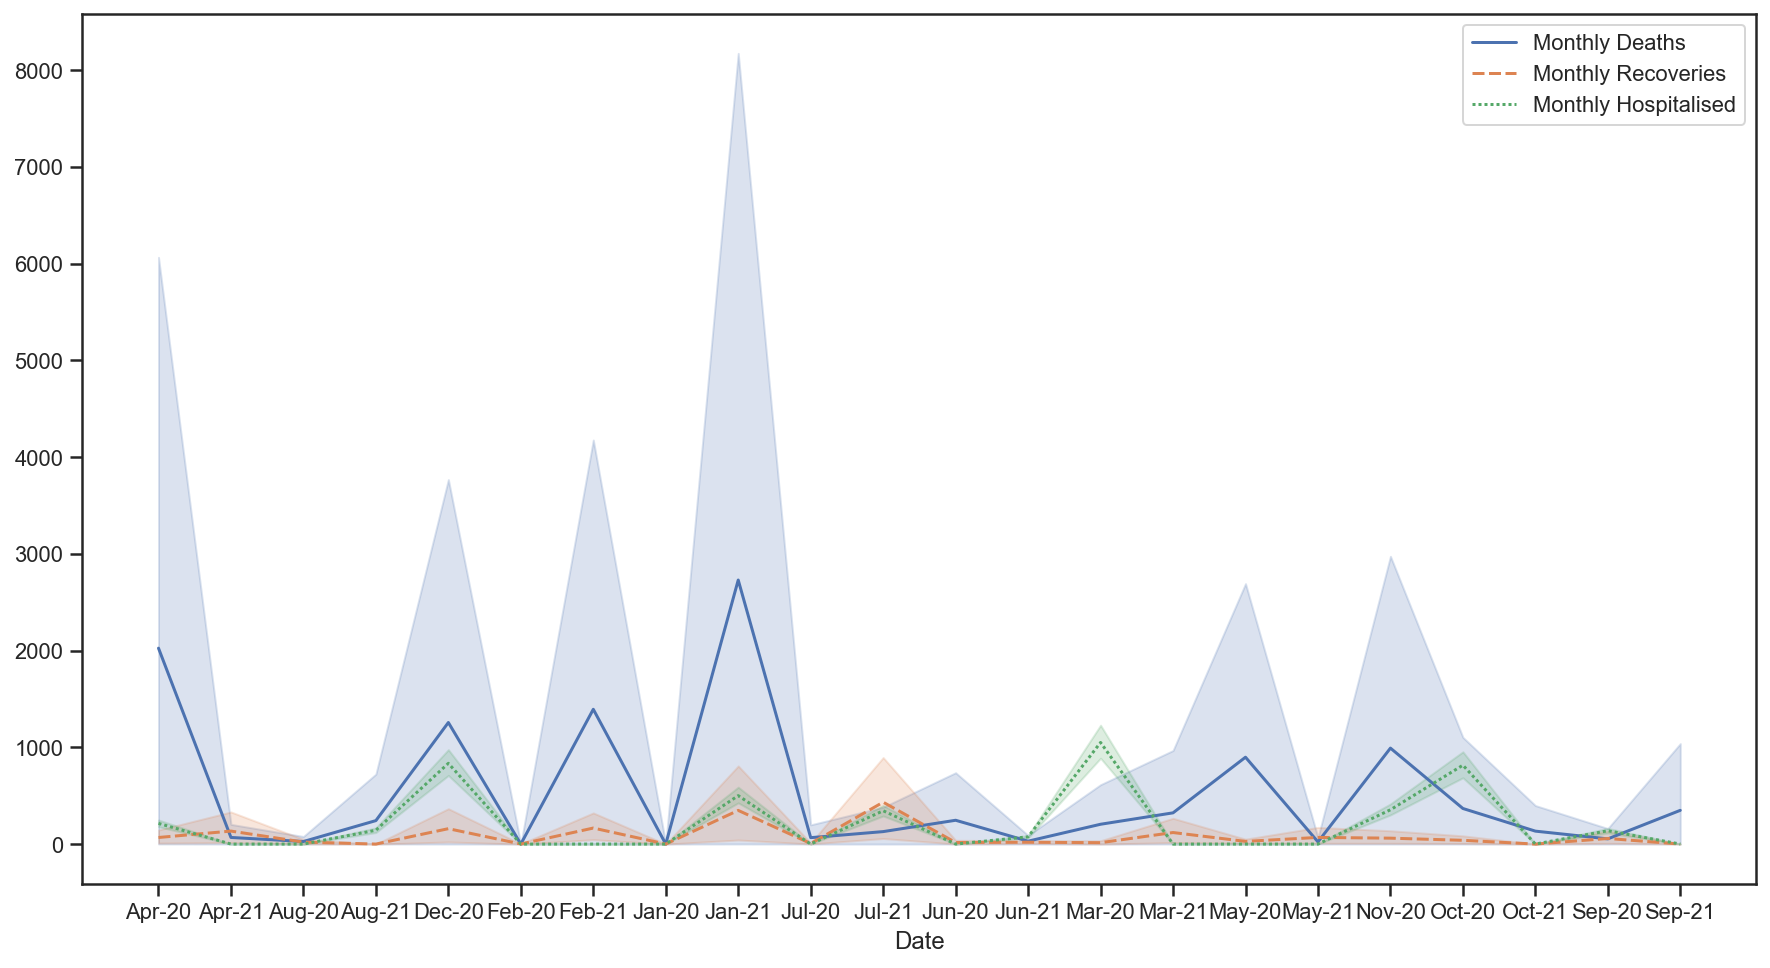

In [85]:
# Chart total monthly data
plt.figure(figsize = (15,8))
sns.lineplot(data=monthly_country_cases_chart)

<AxesSubplot:xlabel='Date'>

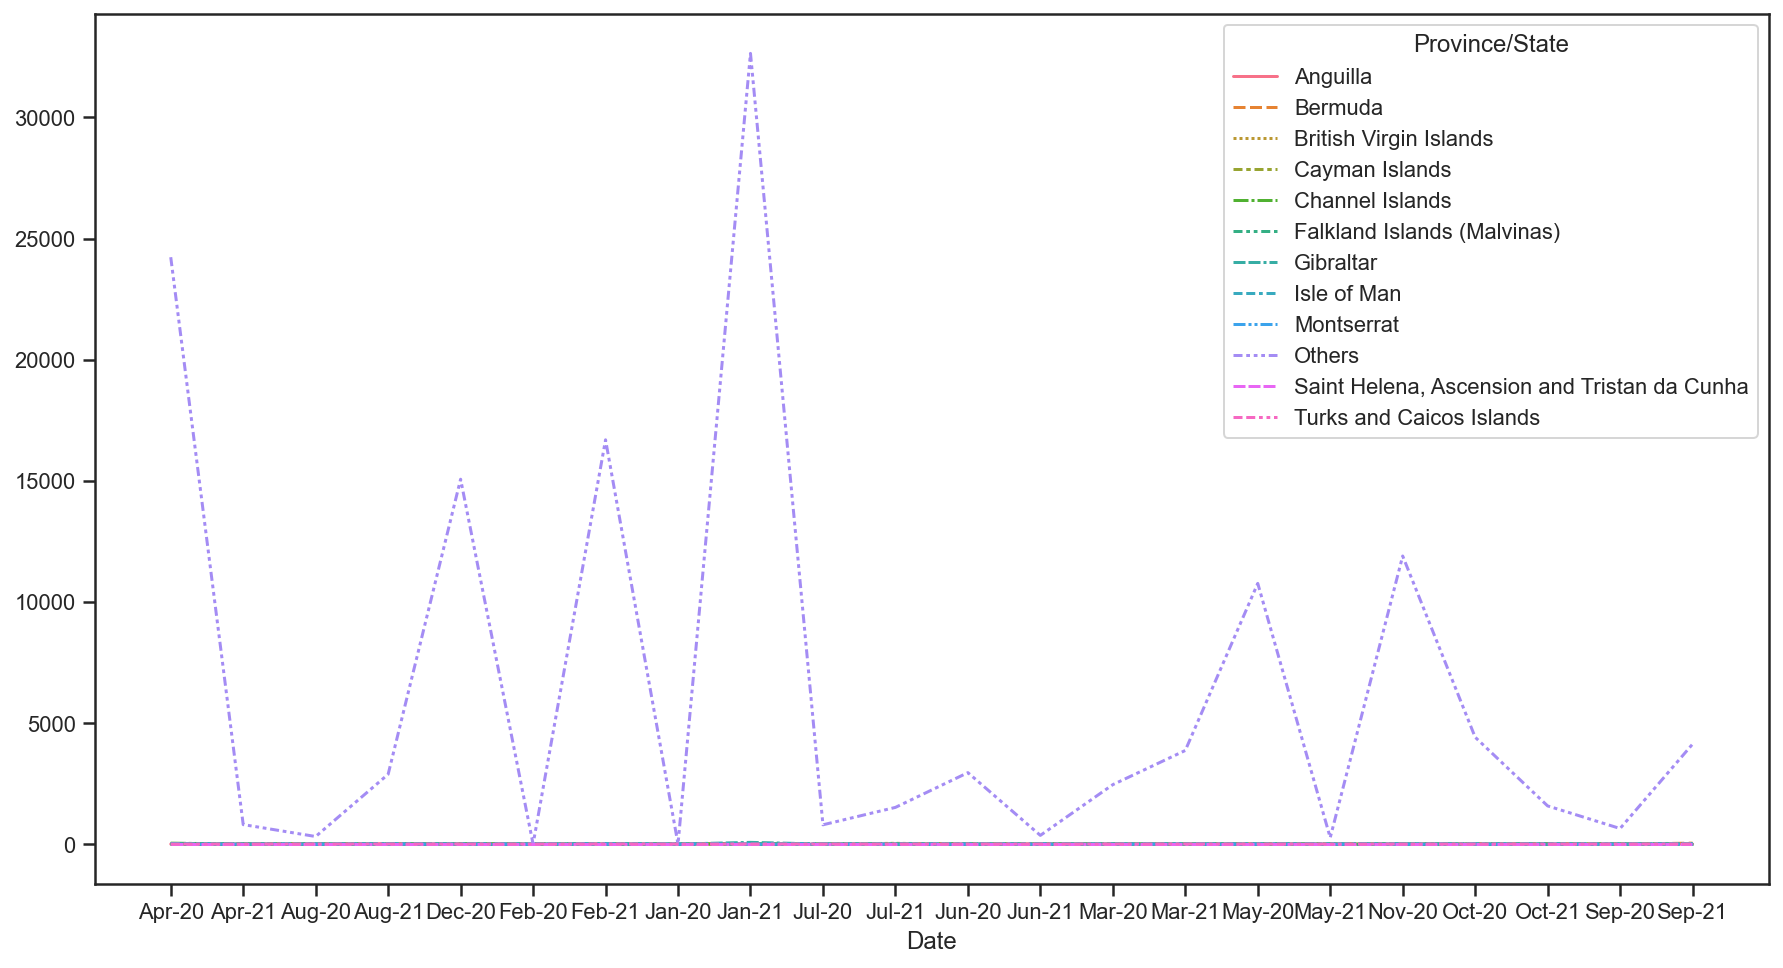

In [86]:
# Chart monthly deaths by region
plt.figure(figsize = (15,8))
sns.lineplot(data=monthly_country_cases_chart['Monthly Deaths'])

<AxesSubplot:xlabel='Date'>

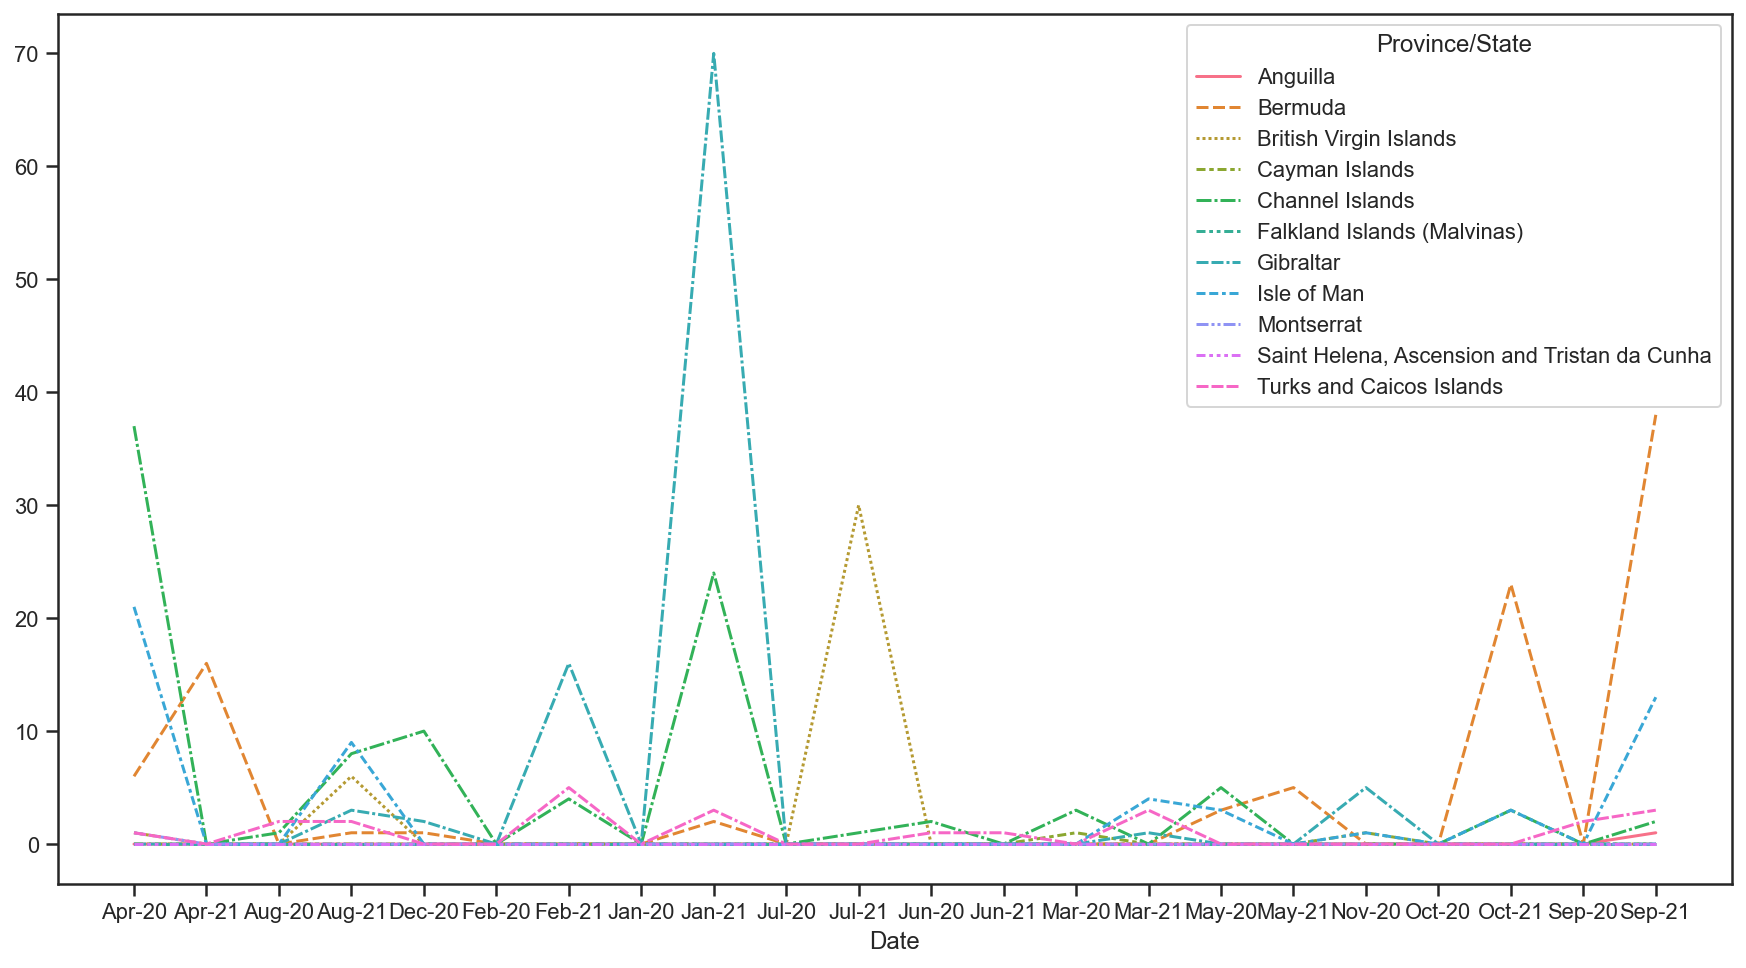

In [87]:
# Clean out 'others' since we don't know where they are from
final_monthly_cases_country_cleaned = pd.read_csv('FinalMonthlyCasesCountryCleaned.csv')

# Pivot data for linechart
final_monthly_country_cases_chart = final_monthly_cases_country_cleaned.pivot('Date', 'Province/State')
final_monthly_country_cases_chart

# Chart monthly deaths by region
plt.figure(figsize = (15,8))
sns.lineplot(data=final_monthly_country_cases_chart['Monthly Deaths'])

<AxesSubplot:xlabel='Date'>

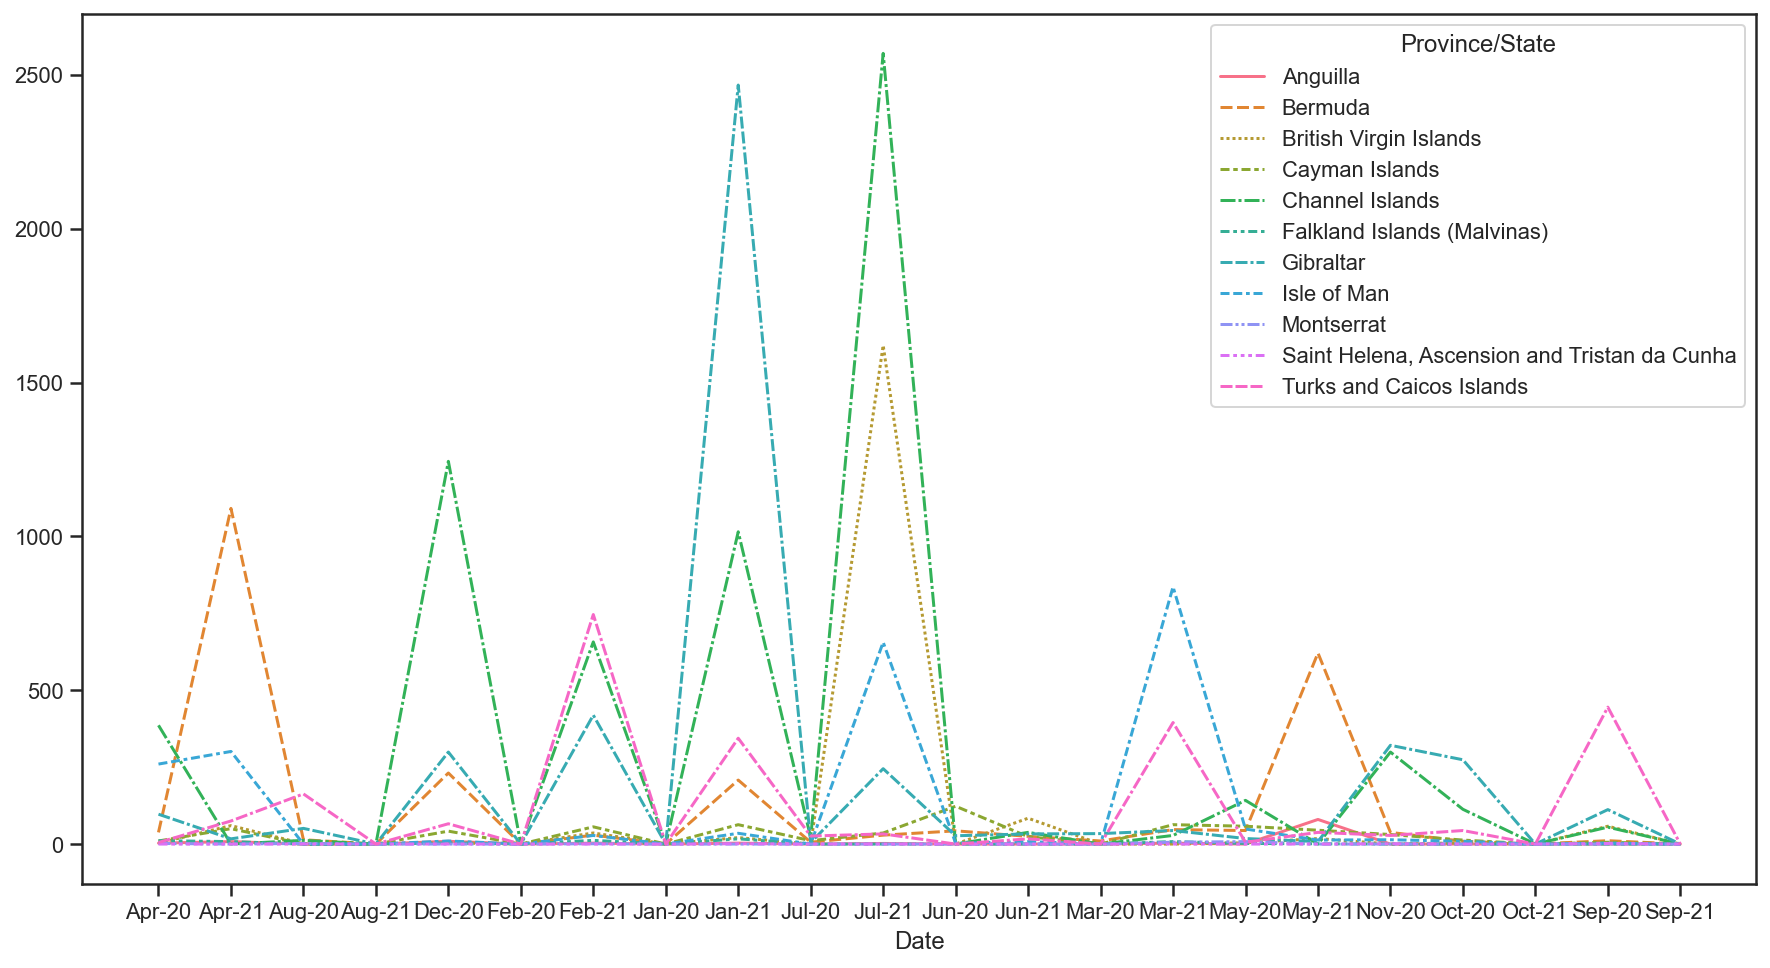

In [88]:
# Chart monthly recoveries by region
plt.figure(figsize = (15,8))
sns.lineplot(data=final_monthly_country_cases_chart['Monthly Recoveries'])
